In [1]:
#Importing all the required packages and libs

from urllib.request import urlopen
from collections import defaultdict
import matplotlib
import matplotlib.pyplot as plt
import json
import random
import csv
import seaborn as sns
import sys
import re
import urllib
from pandas.io.json import json_normalize
import pandas as pd
from pandas.plotting import scatter_matrix

%matplotlib inline   #this is required to print the charts in the jupyter notbook

#the link is storing the link of the api that we are calling
link='https://data.smartdublin.ie/cgi-bin/rtpi/busstopinformation?stopid&format=json'
#The response Variable is storing the json respons that we re getting from the url
response =urlopen(link)
#The jstring is converting the url response to string
j_string= response.read()
#then  we are loading that string in parsed_json
parsed_json = json.loads(j_string)

#Creating new CSV file
dublin_bus= open('dublin_bus.csv', 'a', newline='')

#taking a counter variable count
count = 0
#traversing from the main string to till the result section for further access of data as main data is stored here
jd=parsed_json['results']













UsageError: unrecognized arguments: #this is required to print the charts in the jupyter notbook


I took Dublis bus information Api for my assignment, accessed the data from the json format and the main values were in result section of the json string, so i traversed till there and stored it another variable 'jd'

In [153]:
#calling the csv writer function for the object dublin bus to store the value in the csv format
csvwriter = csv.writer(dublin_bus)

#loop was required for traversing till each record that we got in the result
for i  in jd:
          if count == 0:  #if the counter is 0 means the csv is empty then headers should be written

             csvwriter.writerow(['Stopid','fullname','operatorName','routes','NumberOfRoutes','LastUpdated','latitude','longitude'])

          count += 1     #else the counter should be incremented and the the values should be written
          j= len(i['operators'][0]['routes'])  #calculated the number od bus routes by getting the string length of the bus routes names that were written
          new_string = re.sub('[^a-zA-Z0-9\n\.]', ' ', str(i['operators'][0]['routes']))  #removed special characters from the bus route name 
          i['operators'][0]['routes']=new_string #passed back the  new value to the string
          full_name= str(i['fullname'])  
          i['fullname']= full_name  #passed pack the string value of the name to the string
            #The raw data was written to the Csv format
          csvwriter.writerow([i['stopid'],i['fullname'],i['operators'][0]['name'], i['operators'][0]['routes'],j,i['lastupdated'],i['latitude'],i['longitude']])





In the above steps , Data was  accessed and converted into proper formats before passing to the csv. A new column 'Numberof routes' was derived from the routes column by counting the number of routes were present.

In [152]:

#creating the panda data frame from the csv
data1=pd.read_csv('dublin_bus.csv',encoding='latin-1') #the data was stored in utf-8 format and while reading latin1 conversion ws required

#the raw data consisted of 9834 records for analysing purpose top 102 records were considered

data2= data1[['Stopid','fullname','routes','NumberOfRoutes','operatorName']].head(102)  #fetches top 102 records out of 9834 records


Frequency =[]

#to derive a new column frequency of the routes ,traversing through whole records through loops
for l in pd.to_numeric(data2.NumberOfRoutes):

    if l > 10:

            Frequency.append('Most no of  Routes')

    elif l > 5:

            Frequency.append('Less no of Routes')

    else:

            Frequency.append('Least no of routes')

            #adding the new column to the data frame
data2['Frequent_routes'] = Frequency

print("Sample 5 records from the data frame for insight of the data")
print(data2.head(5))




Sample 5 records from the data frame for insight of the data
  Stopid        fullname                                     routes  \
0      2  Parnell Square    38B    38D    46A    46E    38    38A     
1      3  Parnell Square                               120    122     
2      4  Parnell Square                 7    9    7D    7A    7B     
3      6  Parnell Square                                        4     
4      7  Parnell Square            40    40D    40B    140    13     

  NumberOfRoutes operatorName     Frequent_routes  
0              6          bac   Less no of Routes  
1              2          bac  Least no of routes  
2              5          bac  Least no of routes  
3              1          bac  Least no of routes  
4              5          bac  Least no of routes  


In the above steps, the data was retreved from the csv , to add a new column 'frequency_routes' , loop was used to store the values wherever the condition was met and a categorical column was derived from original column

The Bar Chart


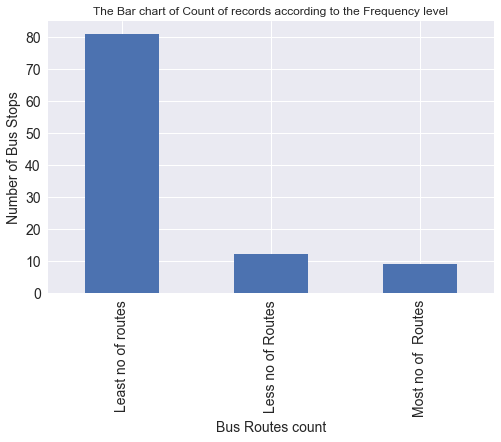

In [110]:

#BAR GRAPH
print("The Bar Chart")
counts = data2["Frequent_routes"].value_counts()  #this step stores the count of the frequency of data
p = counts.plot.bar(figsize=(8,5),   #creating a object of count with size of the plot
fontsize=14)
p.set_xlabel("Bus Routes count",fontsize=14)  #setting the x label
p.set_ylabel("Number of Bus Stops",fontsize=14) #stting the y label
p.set_title('The Bar chart of Count of records according to the Frequency level') #setting the title


The above bar chart that is created gace us insight that the 100 records that we chose for the analysis had more records of 'lessfrequent routes' and minimum records of 'Most number of routes'. The analysis is that it may change for the next sample of data and to get an overall picture all the 9438 records should be considered.

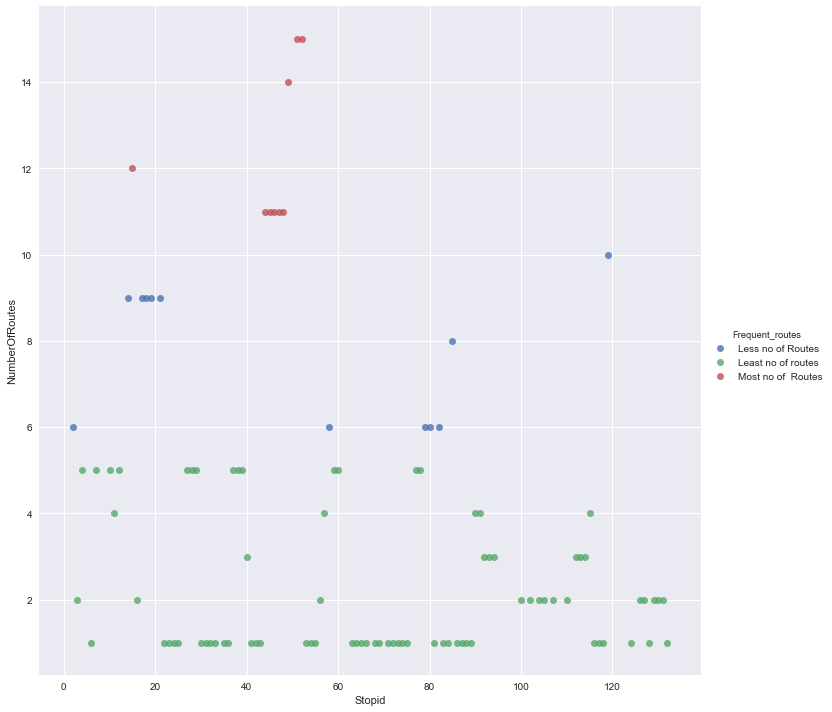

In [150]:


df = data2[['Stopid', 'NumberOfRoutes','Frequent_routes','operatorName']] 
df['Stopid']=df['Stopid'].astype(float)
df['NumberOfRoutes']=df['NumberOfRoutes'].astype(float)
df.is_copy=False

sns.lmplot('Stopid', 'NumberOfRoutes', data=df,size=10, hue='Frequent_routes', fit_reg=False)


The above scatter plot gives us the idea that each bus stop has how many numer of routes and color gives us the idea that it falls under which frequent routes.It tells us the that the bus stop density in least frequent routes are more.

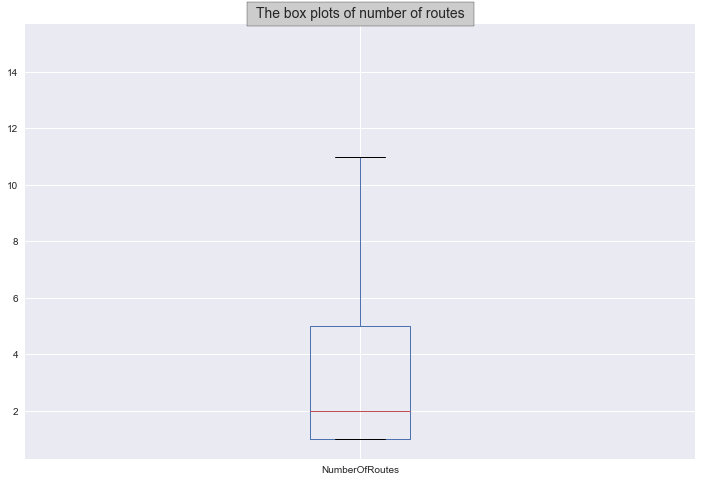

In [145]:
#sns.boxplot('Stopid', 'NumberOfRoutes', data=df,width=5,
plt.title(" The box plots of number of routes ",bbox={'facecolor':'0.8', 'pad':5,}, fontsize=14)
df['NumberOfRoutes'].plot.box(return_type='axes', figsize=(12,8))

The box plot gives us an idea that how many number of routes fall below the man value and how many above the mean value. This type of chart is useful for statistical data.

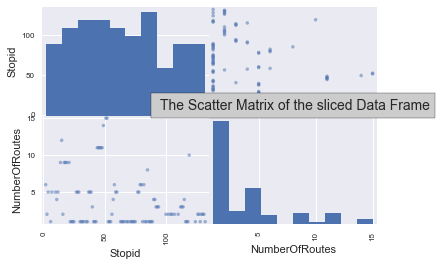

In [130]:
scatter_matrix(df)



The scatter plot gives u combination of charts for all the column present in the dataframe

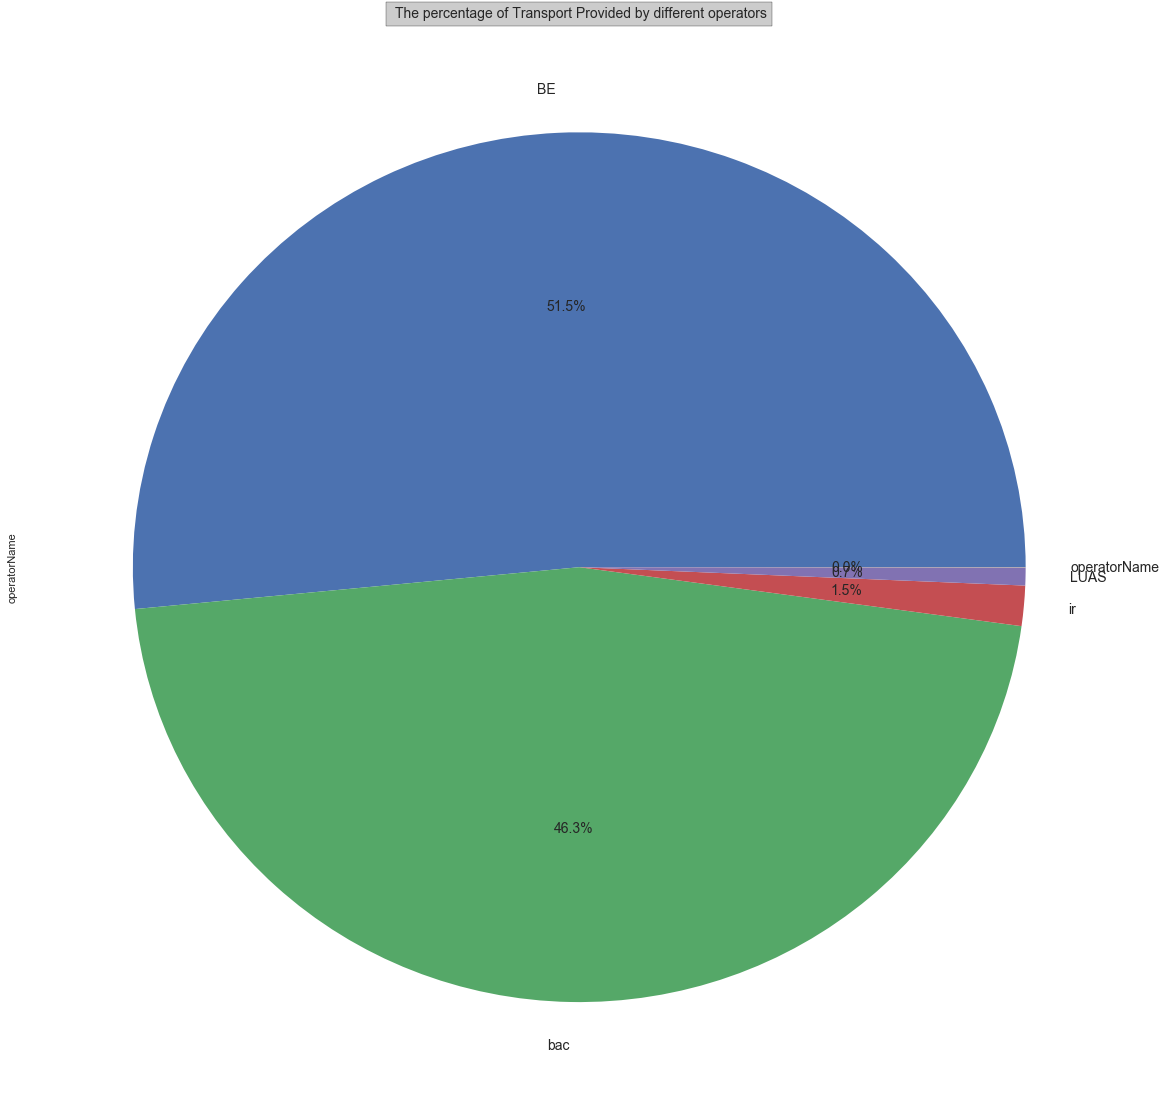

In [154]:
counts1=data1["operatorName"].value_counts()
counts1.plot.pie( figsize=(20,20),autopct ='%1.1f%%',fontsize=14)
plt.title(" The percentage of Transport Provided by different operators",bbox={'facecolor':'0.8', 'pad':5,}, fontsize=14)

The pie chart above contains the operator and the numer of busstops they cover and from above chart it is visible 
that most bus stops are covered by BAC and least by LUAS

Conclusion For the sample data taken:

1. The most bust stops fall under least frequnt routes.
2. The most number of bus stops have the values of routes less than the mean value and is visible in the box plot.
3. The bus stops is mostly covered by BAC and least covered by LUAS